# Homework 2 - How do Taxis move in NYC?

##### Work done by Gabriele Macchi, Ilaria Servadio, Davide Toma, Jad Zouwayhed.

General notes:
-	We decide to consider for running the analysis the **borough of departure** because the analysis we will do can have *business value for taxi drivers* as it can be useful to understand which months and days are more profitable.
-	Something important is that we have also considered journeys belonging to **'Unknown'** (borough). The trips included under this name are all those trips where the driver has, maybe, forgotten to enter the departure zone or the arrival zone. Obviously, they are trips made, so, for this we have taken it into account in the *general analysis of NYC* but we will not take it into consideration in the *analysis of the individual borough*.
-	Depending on the RQ and therefore depending on the columns that we consider of the data frame (Yellow cabs data), from time to time, we decide whether to consider or delete the **NaN values**.


#### Show which packages we used:

In [51]:
import pandas as pd
import matplotlib.pyplot as plt #library for creating charts
import seaborn as sns
import datetime as dt
import numpy as np
from scipy import stats 
import seaborn as sns
import itertools
import folium
from branca.colormap import linear
import warnings
warnings.filterwarnings("ignore")

# [RQ1] In what period of the year Taxis are used more?

For *Yellow cabs data* we only take the following columns: 'LocationID','Borough'.

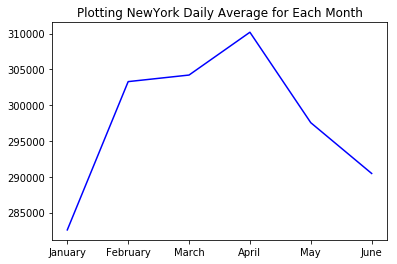

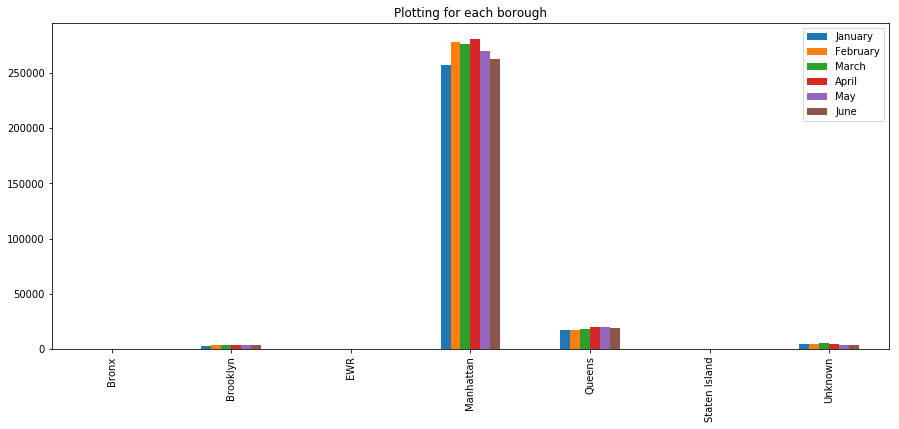

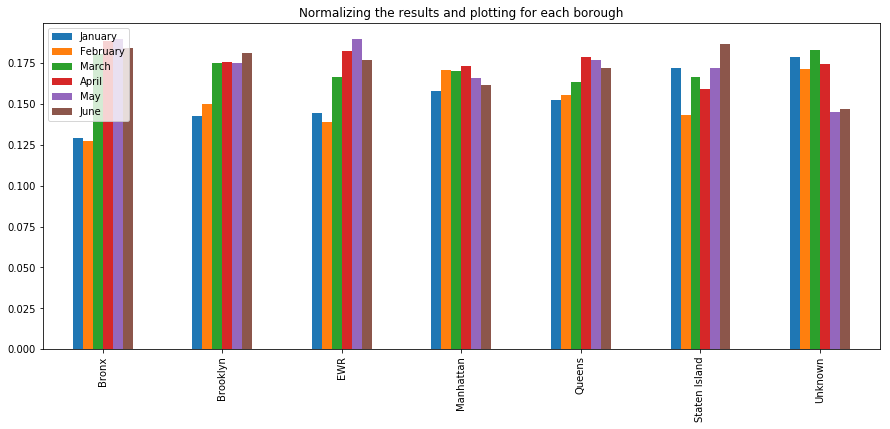

Running time equal to 0:00:32.725034


In [2]:
start = dt.datetime.now()
def daily_average_per_month():
    months = ['January','February','March','April','May','June']
    days = [31,28,31,30,31,30]
    #importing lookup csv
    borg = pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols = ['LocationID','Borough'],dtype={'LocationID':'int16','Borough':'category'}) 
    #list of unique borough names
    quartieri = sorted(list(borg.Borough.unique())) 
    mesi = {}
    avg_trip = []
    for i in range(6):
        #loading each month
        df = pd.read_csv('yellow_tripdata_2018-0%s.csv' %(str(i+1)), sep=',', usecols=["PULocationID"])
        #appending average trips per day for each month into avg_trip[]
        avg_trip.append(df.count()[0]/(days[i])) 
        #joining trips with their corresponding borough name
        conto_borghi = df.set_index('PULocationID').join(borg.set_index('LocationID'))
        #calculating average trips per day for each borough
        l = list(map(lambda x: x/(days[i]), conto_borghi.groupby('Borough').size()))
        #storing results in dictionary with their with the month name as key
        mesi[months[i]] = l 
        del df
    plt.plot(months,avg_trip, color = 'b') #plotting daily average trips for each month
    plt.title("Plotting NewYork Daily Average for Each Month")
    plt.show()
    df_ = pd.DataFrame(mesi, index = quartieri)#plotting for each borough
    ax = df_.plot.bar(figsize = (15,6))
    plt.title("Plotting for each borough")
    plt.show()
    avg_months_quart = pd.DataFrame.from_dict(mesi, orient = 'index', columns = quartieri)
    avg_months_quart = list(avg_months_quart.sum())
    for mese in mesi:
        for i in range(len(quartieri)):
            mesi[mese][i] = mesi[mese][i] / avg_months_quart[i]
    df_ = pd.DataFrame(mesi, index = quartieri)
    ax = df_.plot.bar(figsize = (15,6))
    plt.title("Normalizing the results and plotting for each borough")
    plt.show()
daily_average_per_month()
end = dt.datetime.now()
print('Running time equal to',end-start)

**Plotting New York Daily Average for Each Month**: on the y-axis  there is the average number of trips recorded each day per month and on x-axis there are the months. As the name of the chart says, this plot represents an analysis for all of New York.  Subsequently, we do an analysis for all the boroughs.

**Plotting for each borough**: since this plot is not so clear, the following plot is the same of this, but each month is normalized by the total number of trip in that month.

**Normalizing the results and plotting for each borough**: as we can see, the period of the year when taxis are used more is mainly from April, May and June; probably because in this period the city is filled with tourists due to, for example, the best climate.

# [RQ2] What are the times slots with more passengers?

### Clean up the data: 
remove all the years different from 2018.

## Analysis for NYC

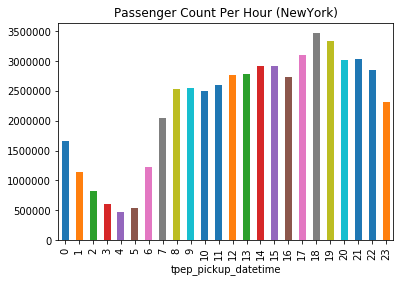

Running time equal to 0:01:02.146281


In [3]:
start = dt.datetime.now()
borg = pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols = ['LocationID','Borough'],dtype={'LocationID':'int16','Borough':'category'})
for i in range (6):    
    iter_csv = pd.read_csv("yellow_tripdata_2018-0%s.csv" %(str(i+1)), sep = ",", 
                               usecols= ["tpep_pickup_datetime", "passenger_count", "PULocationID"],dtype={'passenger_count':'int16',
                                                                                                          'PULocationID':'int16'})
    iter_csv['tpep_pickup_datetime']=pd.to_datetime(iter_csv['tpep_pickup_datetime'])
    iter_csv=iter_csv[iter_csv.tpep_pickup_datetime.dt.year==2018] #clean the data
    iter_csv = iter_csv.merge(borg,
                            left_on = "PULocationID",
                            right_on = "LocationID",
                            how = "inner")

    iter_csv=iter_csv['passenger_count'].groupby([iter_csv.Borough,iter_csv.tpep_pickup_datetime.dt.hour]).count()
    iter_csv=pd.DataFrame(iter_csv)
    iter_csv.reset_index(inplace=True)
    try :
        merged = pd.concat([iter_csv, merged], ignore_index = False)
    except:
        merged = iter_csv
    del iter_csv
#Plotting passenger count per hour for NewYork
pltdata=merged.drop(['Borough'],axis=1)
pltdata=pltdata.groupby(pltdata.tpep_pickup_datetime)['passenger_count'].sum()
pltdata.plot(kind='bar')
plt.title('Passenger Count Per Hour (NewYork)')
plt.show()
end = dt.datetime.now()
print('Running time equal to',end-start)
def passengers_per_borough(bor):
    pltbor=merged[merged.Borough==bor]
    pltbor=pltbor.groupby(pltbor.tpep_pickup_datetime)['passenger_count'].sum()
    pltbor.plot(kind = "bar")
    plt.title(bor)
    plt.show()

As we can see graphically after midnight, from one to five, there is a decrease in taxi rides.  Subsequently, there is an increase. So, taxi riders are greater during the day than the night.

## Bronx

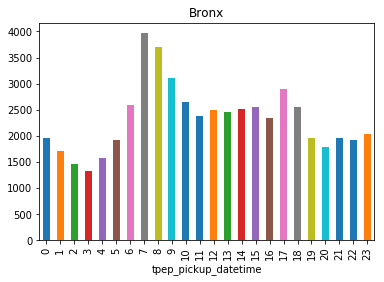

In [4]:
passengers_per_borough('Bronx')

Bronx is a borough with few people using taxis.

We know that Bronx is a poor zone and so we can say that taxi isn't the most common way people use to go where they work, probably they use a cheaper public transport way (bus or metro).

However, we see that *the highest timeslot is 7 am*, and this is because some people use taxi to reach their job place that isn't in Bronx.

## Brooklyn

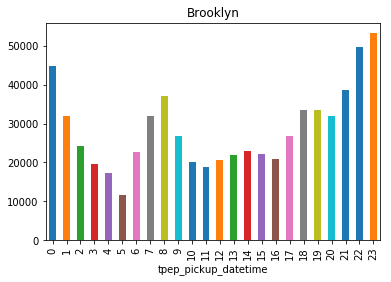

In [5]:
passengers_per_borough('Brooklyn')

We have to consider that brooklyn has a very structured public transport network.

*The higher timeslot of Brooklyn is 23 and we have peaks also in 8*.

The idea for us is that Brooklyn is the most populated of the New York boroughs, so a lot of people have to come to their job from Brooklyn (that's why we see the peak at the 8 timeslot) and also in Brooklyn we have places like restaurants, bar and so on, where people spend their time after job with their friends and they take taxies to return home (this is our explanation to the peak at 23).

## EWR

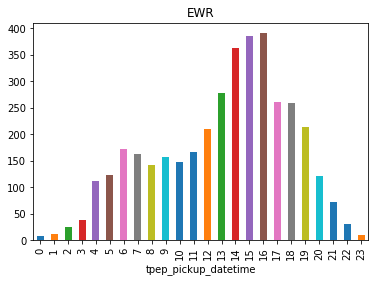

In [6]:
passengers_per_borough('EWR')

This is the third airport in New York and is therefore the least used and this can be seen from the total number of trips from this borough, which are very low.
*The hour with more runs is 16*, of course because the flights land especially in the afternoon.

## Manhattan

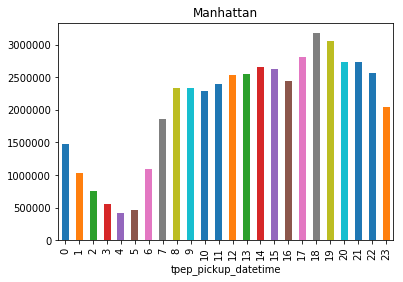

In [7]:
passengers_per_borough('Manhattan')

So bearing in mind that Manhattan has by far the highest numbers of taxi rides of the other boroughs, we can now comment the plot:

*The higher timeslot of Manhattan is 18*. In general we see that during the day (in particular in the afternoon) we have a lot of people using taxi in Manhattan. That's because Manhattan is the center of the city and there we can find the most famous places in town.
So if you are tourist or you live in New York you have to go to Manhattan; in fact, New York has 8 million of inhabitants, but only a little part of them live in Manhattan, that is the place where a large part of people in New York works.

In conclusion, we can say that we have the highest number of people in taxi at 18 probably because they leave their job and want to return home.

## Queens

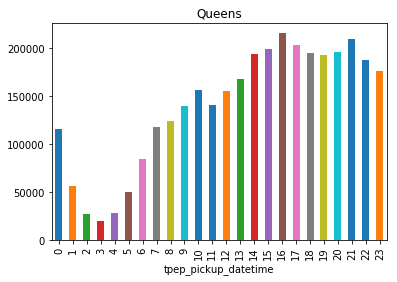

In [8]:
passengers_per_borough('Queens')

In absolute terms, Queens has not the number of people using taxi here than in Manhattan.

*The timeslot with the higher number of passengers here is 16* and in general we see that the afternoon is very common to find people using taxi here.

We can say that it depends by the fact that in Queens we find the two main airports in New York : JFK and La Guardia airport.
The afternoon is the most common period of the day where the flights land, so our idea here is that we can find a lot of tourists taking taxi when they arrive in New York to reach the place (house,hotel) where they stay in New York.

## Staten Island

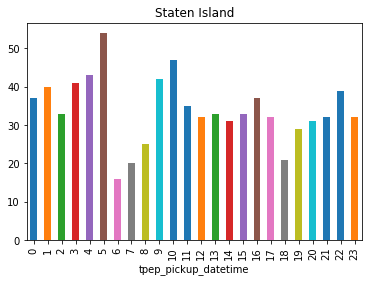

In [9]:
passengers_per_borough('Staten Island')

Staten Island has the lowest number of people using taxies in absolut in New York.

*The highest timeslot is 17* but we have peaks *also in 15*, but we have numbers so low that we can only try to understand the reason why this is happening. And of course here we have too low numbers of passengers to analyze the timeslots and draw conclusion on this.

The reason we have very low number of passengers using taxis could be that this borough other categories of taxis (green ones) that serve this zone or that in the large part of the borough taxis are not allowed to drive.

In [10]:
del merged #run this to delete the dataframe after you are done with RQ2

# [RQ3] DO THE ALL TRIPS LAST THE SAME?

In [11]:
format_date = '%Y-%m-%d %H:%M:%S'
#This is the format with which the dates are represented inside the data frame.

Let's go to read all the Yellow cabs data of the year 2018. Due to the size of file we need a strategy to deal with data. For this reason, we decide to take from the data only the columns that we need during the analysis and this columns change everytime we answer to a new question. In this case we use three columns:
- **PULocationID** : id reported to the borough of departure; 
- **tpep_pickup_datetime**: the day and the hour of departure of the passenger;
- **tpep_dropoff_datetime**: the day and the hour of the arrival.

In [12]:
frame = pd.DataFrame()
list_ = []
for i in range(6):
    df = pd.read_csv('yellow_tripdata_2018-0%s.csv' %(str(i+1)), sep=',', 
                     usecols=['PULocationID','tpep_pickup_datetime','tpep_dropoff_datetime'])
    list_.append(df)
frame = pd.concat(list_)

#### How can we clean up the data? 
1) Obviously the **duration of the trip can not be anything**, so every time we repeat this condition we do not take the data related to it:

In [13]:
frame = frame[frame.tpep_pickup_datetime != frame.tpep_dropoff_datetime]

2 ) **Remove missing values**: We decided to eliminate null values because if they were present, the data that contains them would no longer be useful for our analysis. In fact, if the NaN value is located under the column *PULocationID* we can't merge that data with the dataset 'taxi_zone_lookup.csv' that we read later. In the event that the NaN value is located under  *tpep_pickup_datetime* or *tpep_dropoff_datetime* we can't compute the travel time.

In [14]:
frame.dropna() #Eliminate NaN values.
frame.dropna().head() #Shows only the first five elements

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID
0,2018-01-01 00:21:05,2018-01-01 00:24:23,41
1,2018-01-01 00:44:55,2018-01-01 01:03:05,239
2,2018-01-01 00:08:26,2018-01-01 00:14:21,262
3,2018-01-01 00:20:22,2018-01-01 00:52:51,140
4,2018-01-01 00:09:18,2018-01-01 00:27:06,246


As follows, for each row of the data frame, we calculate the time that has elapsed since the customer climbs into the taxi until it reaches its destination. Since we are working with data frames we do not need to do a for loop to calculate this difference. Using the *to_datetime*  function and specifying a *format* to match our data we can convert the field of data frame that was imported as string format to a datetime column.

In [15]:
pickup = pd.to_datetime(df['tpep_pickup_datetime'].str.strip(), format = format_date)
dropoff = pd.to_datetime(df['tpep_dropoff_datetime'].str.strip(), format = format_date)
difference = (dropoff - pickup).astype('timedelta64[m]')
#whit 'astype('timedelta64[m]')' we consider only the minutes.

### In the first semester of 2018 *travels last in the media* (in all NYC):

In [16]:
difference.mean()

17.14248474637619

Let's see graphically! This is because too high values are few and do not interest me;in fact the goal is to see if the trips have the same duration or not and obviously when a duration is repeated only once or a little more I can reject it:

In [17]:
durate = difference.value_counts().sort_index()[0:1500]

In [ ]:
plt.subplot(2, 2, 1)
ax1 = durate
ax2 = durate[0:80]
ax1.plot(figsize = (11,11), color = 'r')
ax2.plot(figsize = (11,11), color = 'b')
plt.xlabel('Duration of the journey')
plt.ylabel('How many trips')
plt.subplot(2, 2, 2)
durate[0:80].plot(figsize = (12,11), color = 'b')
plt.xlabel('Duration of the journey')
plt.ylabel('How many trips')
plt.show()

As we can see from the first graph, the concentration is in the first 80 so we prefer to do an analysis focused on it and we'll make it in the second graph. This distribution has a structure of a *lognormal distribution*. This type of distribution is applicable when the quantity of interest must be positive, since  log(x) exists only when x is positive. We can see online the features of __[Lognormal distribution](https://brilliant.org/wiki/log-normal-distribution/)__ 


In [18]:
frame['travel_time'] = difference
# We create a new column in our data frame which represents journey times.

## Analysis for each borough

At this point, let's do an analysis for each borough. The first thing that we need to do it's insert a new dataset that we find in 'taxi_zone_lookup.csv' for combine it with the Yellow cabs data. From the csv we take only the two columns that actually we need: *Borough* and *LocationID*.

**LocationID** it's the common point with 'frame', thanks to it, we can merge the two data frames in the right way (LocationID with PULocationID).

**Borough** is useful because of it, we can see the different id to which district they refer.

In [19]:
borg = pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols = ['LocationID','Borough'])
quartieri = sorted(list(borg.Borough.unique()))
borg.dropna().head() #'head()' shows only the first five.

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


With 'dropna()' we remove all the NAN values from the data frame because if the borough is not specified or the ID is not specified to which borough corresponds; to us that data loses value.

In [20]:
merge_output = pd.merge(frame,
                        borg, 
                        left_on = 'PULocationID',
                        right_on = 'LocationID', 
                        how = 'inner')
drop_output = merge_output.drop(['tpep_pickup_datetime' ,'tpep_dropoff_datetime','PULocationID'], axis = 1)

After 'merge' the two data frame we remove the columns that we don't need. In this way, we can work more easily with less data.

### Let's see a use useful graph for our analysis with a library called *BOKEH*
We import the basic elements from Bokeh (i.e. figure, output_file, show, and ColumnDataSource). We also make two new imports: Spectral7 is a pre-made seven color pallette, one of Bokeh’s many pre-made color palettes and factor_cmap is a helper method for mapping colors to bars in a bar-charts.

*grouped = df.groupby('Borough')['travel_time'].mean()* --> We chose only the column that we need for our analysis and do the average for each borough. Infact, we use the mean method to let Pandas know how to aggregate all of the different rows.   Groupby  -->tell Pandas how to group the data together.

After, we need to make a ColumnDataSource from our grouped data and create a figure. Since our x-axis will list the seven borough  we need to tell the figure how to handle the x-axis; for do this we create a list.

Moving on, we plot our data as individually colored bars. To color our bars we use the factor_cmap(). This creates a special color map that matches an individual color to each category.

##### We have inserted the html file in README because otherwise this file.ipynb was too big to be loaded on github

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

from bokeh.palettes import Spectral7 #palettes con Spectral 7 perchè the borough are 7
from bokeh.transform import factor_cmap

output_file('mean_tripduration_NYC.html') #we set our output_file
df = drop_output
grouped = df.groupby('Borough')['travel_time'].mean() # Groupby ->how to group the data together.
#The output is a Series and we can see this with type(grouped)
grouped = pd.DataFrame(grouped) #Now is a Data Frame

source = ColumnDataSource(grouped)
borough = source.data['Borough'].tolist() #Create a list of borough using source.data
p = figure(x_range = borough)

color_map = factor_cmap(field_name='Borough', 
                    palette=Spectral7, factors= borough)
travel_time = source.data['travel_time'].tolist()
p.vbar(x='Borough', top= 'travel_time', source=source, width=0.70, color=color_map)

# Insert the names:
p.title.text ='Average life taxicab'
p.xaxis.axis_label = 'Borough'
p.yaxis.axis_label = 'Travelling time'

# Add a hover tool:
hover = HoverTool()
hover.tooltips = [
    ("Average", "@travel_time about this borough")]

hover.mode = 'vline'

p.add_tools(hover)

show(p)

In [21]:
drop_output = drop_output.groupby('Borough')

### Another graphic representation of all the boroughs together:

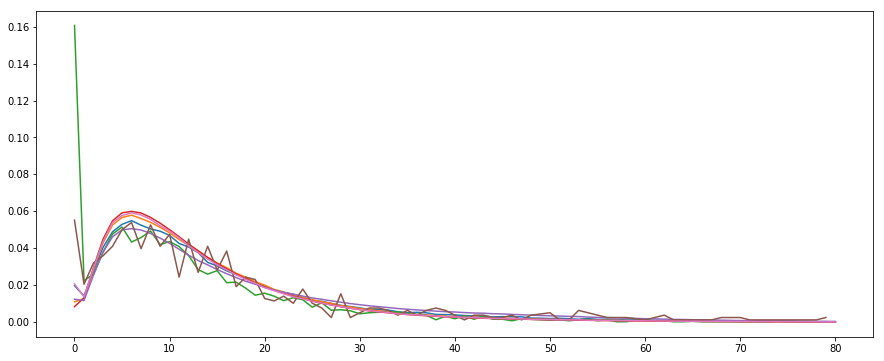

In [22]:
for borough in quartieri:
    quart = drop_output.get_group(borough)
    durate_quart = quart['travel_time'].value_counts(normalize = True).sort_index()
    durate_quart[0:80].plot(figsize = (15,6))

Something important is that, in the two previous graphs, we have also considered journeys belonging to 'Unknown' (borough). The trips included under this name are all those trips where the driver has forgotten to enter the departure zone or the arrival zone. Obviously they are trips made, so, for this we have taken it into account in the general analysis of NYC but we will not take it into consideration in the analysis of the individual borough.

Now, we calculate travel times in each borough:

In [23]:
Bronx = drop_output.get_group('Bronx') #'get_group()'constructs NDFrame from group with provided name
durate_Bronx= Bronx['travel_time'].value_counts().sort_index()

Brooklyn = drop_output.get_group('Brooklyn')
durate_Brooklyn= Brooklyn['travel_time'].value_counts().sort_index()

EWR = drop_output.get_group('EWR')
durate_EWR= EWR['travel_time'].value_counts().sort_index()

Manhattan = drop_output.get_group('Manhattan')
durate_Manhattan= Manhattan['travel_time'].value_counts().sort_index()

Queens = drop_output.get_group('Queens')
durate_Queens= Queens['travel_time'].value_counts().sort_index()

Staten_Island = drop_output.get_group('Staten Island')
durate_StatenIsland= Staten_Island['travel_time'].value_counts().sort_index()

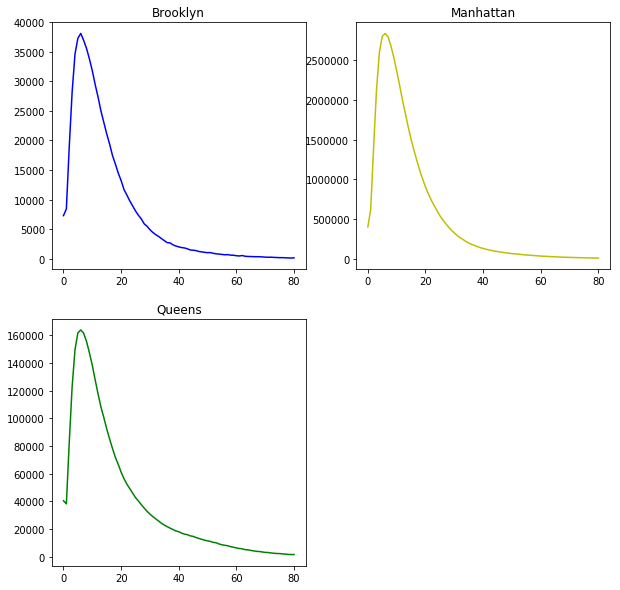

In [24]:
plt.subplot(2, 2, 1)
durate_Brooklyn[0:80].plot(title = 'Brooklyn', figsize = (10,10), color = 'b')
plt.subplot(2, 2, 2)
durate_Manhattan[0:80].plot(title = 'Manhattan',figsize = (10,10), color = 'y')
plt.subplot(2, 2, 3)
durate_Queens[0:80].plot(title = 'Queens',figsize = (10,10), color = 'g')
plt.show()

As we can see from the graphs, the distribution of trip's duration for these borough has a structure of a lognormal distribution, just like we have already seen for NYC in general. For all three, journeys last on average 16-19 minutes but the number of trips is very different between the boroughs.

Manhattan has the highest number of trips, obviously this is related to what we said in RQ2.  As we can see online, many of  __[New York's main attractions](https://www.google.com/destination?q=manhattan&site=search&output=search&dest_mid=/m/0cc56&sa=X&ved=2ahUKEwjhrrfv-7XeAhULgHMKHcuLCkoQri4wKHoECAcQAw#dest_mid=/m/0cc56&tcfs=EhoaGAoKMjAxOC0xMS0xOBIKMjAxOC0xMS0yMg)__ are located in Manhattan. From the center of Manhattan to get to the main attractions of the borough by taxi takes about:
- 14 minutes to get to Times Square;
- 5 minutes to get to The Metropolitan Museum;
- 20 minutes to get to Brodway;
- 10 minutes to get to The MET;
- 14 minutes to get to Museum of the City of New York.

The borough of Queens is the second-largest in population (after Brooklyn) and that's why it's crossed by many taxis. Here we find the two main airports in New York : JFK and La Guardia airport, in fact, as we see from the chart, there are many more trips that last around 40 minutes. Also, it takes about twenty minutes by taxi to get from Queens to Brooklyn

__[Can yellow cabs pick up in Brooklyn?](https://www.google.com/search?ei=g3XcW4nrPIGia86Rm7AN&q=brooklyn+yellow+cab&oq=brooklyn+yellow+c&gs_l=psy-ab.3.0.0j0i22i30k1l9.6039.9200.0.10588.12.9.0.3.3.0.113.860.7j2.9.0....0...1c.1.64.psy-ab..0.12.865...0i67k1j0i10k1.0.BuisByyEHmg)__  How can we read online under 'People also ask', *"Yellow cabs can serve anywhere in NYC, however the practical reality is that they predominantly serve Manhattan"* for this reason the number of runs is lower.

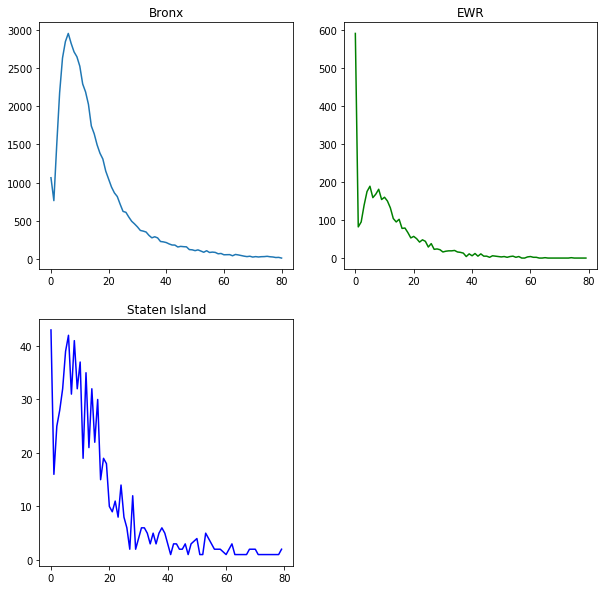

In [25]:
plt.subplot(2, 2, 1)
durate_Bronx[0:80].plot(title = 'Bronx', figsize = (10,10))
plt.subplot(2, 2, 2)
durate_EWR[0:80].plot(title = 'EWR', figsize = (10,10), color = 'g')
plt.subplot(2, 2, 3)
durate_StatenIsland[0:80].plot(title = 'Staten Island', figsize = (10,10), color = 'b')
plt.show()

These three zones have a distribution of trip's duration it is very different from the previous ones and the numbers of taxi trips are less.

Bronx is a poor zone therefore,probably,  people use a cheaper public transport way. Also, this borough is considered to be dangerous from many people, so probably not many tourists visit it.
- To go from the center of the Bronx to the Yankee stadium (located in this borough) it takes about 20 minutes by taxi.
-  To go from the center of the Bronx to the Bronz Zoo  it takes about 7 minutes by taxi.

EWR is a new york airport; from here to get to the main zones by taxi takes about:
- 38 minutes to get to Manhattan;
- 50 minutes to get to Brooklyn;
- 20 minutes to get to Staten Island;
- 50 minutes to get to Bronx;
- 1 hour to get to Queens.

As we have already said (in RQ2), the reason we have very low number of passengers using taxis in Staten Island could be that this borough other categories of taxis (green ones) that serve this zone or that in the large part of the borough taxis are not allowed to drive.

In [26]:
del frame

# [RQ4] What is the most common way of payments?

Let's go to read all the Yellow cabs data of the year 2018. Due to the size of file we need a strategy to deal with data. For this reason, we decide to take from the data only the columns that we need during the analysis and this columns change everytime we answer to a new question. In this case we use two columns:
 - **PULocationID** : id reported to the borough of departure; 
 - **payment_type**:  a numeric code signifying how the passenger paid for the trip.
In the data frame under the 'payment_type' column we find codes that refer to payment methods. In particular: 1 for *Credit card*, 2 for *Cash*, 3 for *No charge*, 4 for *Dispute*.
### We clean up the data:
**Remove missing values**: We decided to eliminate null values because if they were present, the data that contains them would no longer be useful for our analysis. In fact, if the NaN value is located under the column *PULocationID* we can't merge that data with the dataset 'taxi_zone_lookup.csv' that we read later. In the event that the NaN value is located under  *tpep_pickup_datetime* or *payment_type* we can't compute the number of payments for any possible means.
**Also**, as said before, we take only the columns necessary for the analysis.

We need to insert a new dataset that we find in *'taxi_zone_lookup.csv'* for combine it with the Yellow cabs data. From the csv we take only the two columns that actually we need: **Borough** and **LocationID**.
 LocationID it's the common point with 'frame', thanks to it, we can merge the two data frames in the right way (LocationID with PULocationID).
 Borough is useful because of it, we can see the different id to which district they refer. In fact, *the goal* is discover the way payments are executed in each borough.

In [27]:
start = dt.datetime.now()
borg = pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols = ['LocationID','Borough'],dtype={'LocationID':'int16','Borough':'category'})

for i in range(6):
    df = pd.read_csv('yellow_tripdata_2018-0%s.csv' %(str(i+1)), sep=',', 
                     usecols=['payment_type','PULocationID'],dtype={'payment_type':'category','PULocationID':'int16'})
    df = df.merge(borg,
                        left_on = "PULocationID",
                        right_on = "LocationID",
                        how = "inner")
    
    df.dropna #Eliminate NaN values.
    df=df.groupby(['Borough','payment_type'])['PULocationID'].count().reset_index(name="count")
    # Regroup by borough
    df=pd.DataFrame(df)
    try :
        frame = pd.concat([df, frame], ignore_index = False)
    except:
        frame = df
end = dt.datetime.now()
print('Running time equal to',end-start)

Running time equal to 0:00:36.179713


### Let's see graphically what is the most common way of payments in NYC in the first half of 2018:

In [28]:
drop_output=frame.groupby('payment_type')['count'].sum()

[Text(0,0,'1= Credit card'),
 Text(0,0,'2= Cash'),
 Text(0,0,'3= No charge'),
 Text(0,0,'4= Dispute')]

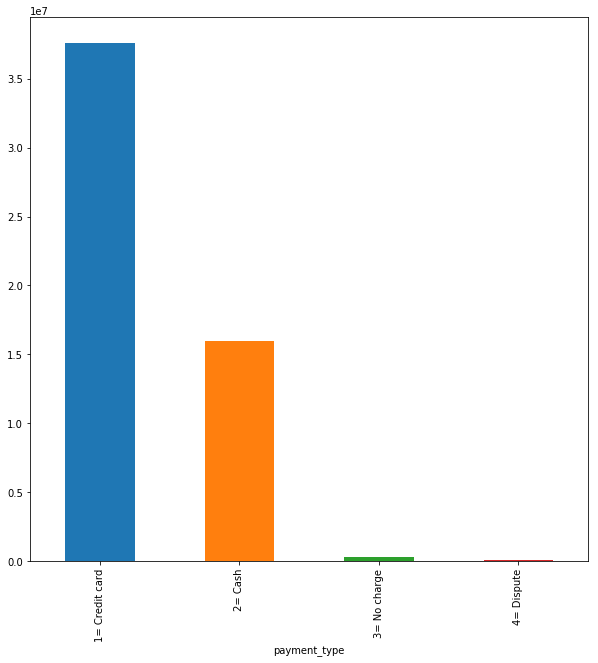

In [29]:
k = drop_output.plot( kind = 'bar', figsize = (10,10))
k.set_xticklabels( ('1= Credit card','2= Cash','3= No charge','4= Dispute') )

As seen, the most widely used  method of payment of yellow taxi is Credit card. In fact, as we can read online, for example here in __[NYC taxi & limousine commission](http://www.nyc.gov/html/tlc/html/passenger/passenger_creditcard.shtml)__, drivers accept credit/debit cards for all fares (there aren't  minimum charge), therefore, *this allows passengers to use their cards  easily*. Also, the driver isn't allowed to refuse to let a passenger use credit card and this payment system is always working because drivers are permitted to work with a broken system for up to 48 hours but usually almost all system repairs must be completed within six hours. To complete, passengers do not have to worry about safety because there is no need to hand the card to the driver and all taxicab systems are certified under the PCI Data Security Standard. What was said allows us to conclude that,for the passengers, pay with the card is a smooth transition.

On the other hand,  whenever passengers who do not want to pay with the card can always pay with cash. In fact, as we see, this is also a widely used payment method.

No charge and dispute  are infrequent.

## Analysis for each borough

### Bronx

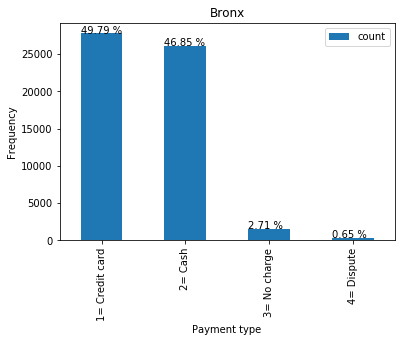

In [30]:
Bronx = frame.groupby(['Borough','payment_type'])['count'].sum()
Bronx=pd.DataFrame(Bronx)
Bronx=Bronx.reset_index(inplace=False)
durate_Bronx = Bronx[Bronx['Borough']=='Bronx']

a = durate_Bronx.plot(title = 'Bronx', kind = 'bar')
a.set_xticklabels( ('1= Credit card','2= Cash','3= No charge','4= Dispute') )
a.set_ylabel('Frequency')
a.set_xlabel('Payment type')
for p in a.patches:
    a.annotate("%.2f %%" % (p.get_height()/sum(durate_Bronx['count'])*100), xy = (p.get_x(), p.get_height()))

plt.show()

As regards this borough, people pay for half with a credit card and for the other half with money.

### Brooklyn

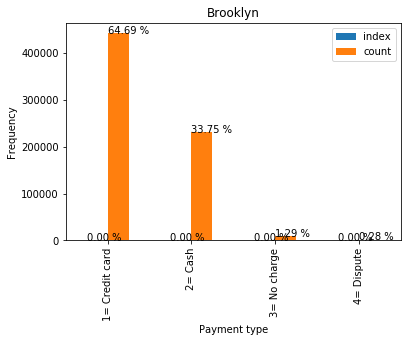

In [31]:
Brooklyn = frame.groupby(['Borough','payment_type'])['count'].sum()
Brooklyn=pd.DataFrame(Bronx)
Brooklyn=Brooklyn.reset_index(inplace=False)
durate_Brooklyn = Brooklyn[Brooklyn['Borough']=='Brooklyn']

a = durate_Brooklyn.plot(title = 'Brooklyn', kind = 'bar')
a.set_xticklabels( ('1= Credit card','2= Cash','3= No charge','4= Dispute') )
a.set_ylabel('Frequency')
a.set_xlabel('Payment type')
for p in a.patches:
    a.annotate("%.2f %%" % (p.get_height()/sum(durate_Brooklyn['count'])*100), xy = (p.get_x(), p.get_height()))

plt.show()

In Brooklyn, the preferred method of payment is a credit/debit card. In fact  approximately 2/3 of passengers pay with this and  approximately  the remainder 1/3 pay by cash. The other two cases are negligible.

### EWR

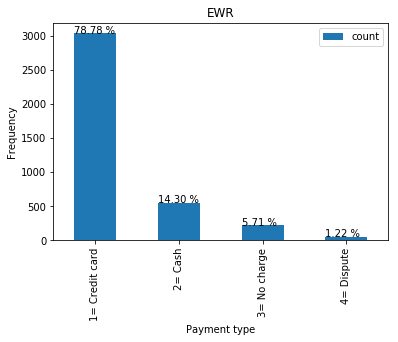

In [32]:
EWR = frame.groupby(['Borough','payment_type'])['count'].sum()
EWR=pd.DataFrame(EWR)
EWR=EWR.reset_index(inplace=False)
durate_EWR = EWR[EWR['Borough']=='EWR']

a = durate_EWR.plot(title = 'EWR', kind = 'bar')
a.set_xticklabels( ('1= Credit card','2= Cash','3= No charge','4= Dispute') )
a.set_ylabel('Frequency')
a.set_xlabel('Payment type')
for p in a.patches:
    a.annotate("%.2f %%" % (p.get_height()/sum(durate_EWR['count'])*100), xy = (p.get_x(), p.get_height()))

plt.show()

Reminding that EWR is a new york airport we can see that, here too, preferred to the payment with card. In fact this is used by about 80% of people. Let's see how the payment with money, compared to the two previous areas, is much less. One reason, for example, could be that people who use a different currency in their country, at the end of the holiday, have run out of liquid cash and therefore not make further changes, they use the card.  Than in the previously cases, here 'No charge' is more evident compared to the total trips made here.

### Manhattan

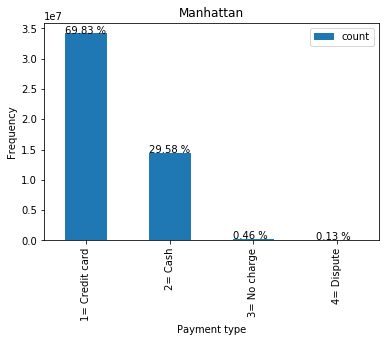

In [33]:
Manhattan = frame.groupby(['Borough','payment_type'])['count'].sum()
Manhattan=pd.DataFrame(Manhattan)
Manhattan=Manhattan.reset_index(inplace=False)
durate_Manhattan = Manhattan[Manhattan['Borough']=='Manhattan']

a = durate_Manhattan.plot(title = 'Manhattan', kind = 'bar')
a.set_xticklabels( ('1= Credit card','2= Cash','3= No charge','4= Dispute') )
a.set_ylabel('Frequency')
a.set_xlabel('Payment type')
for p in a.patches:
    a.annotate("%.2f %%" % (p.get_height()/sum(durate_Manhattan['count'])*100), xy = (p.get_x(), p.get_height()))

plt.show()

Even here in Manhattan, card payment is preferred over cash payment.

### Queens

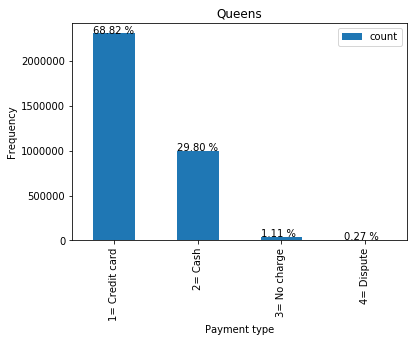

In [34]:
Queens = frame.groupby(['Borough','payment_type'])['count'].sum()
Queens=pd.DataFrame(Queens)
Queens=Queens.reset_index(inplace=False)
durate_Queens = Queens[Queens['Borough']=='Queens']

a = durate_Queens.plot(title = 'Queens', kind = 'bar')
a.set_xticklabels( ('1= Credit card','2= Cash','3= No charge','4= Dispute') )
a.set_ylabel('Frequency')
a.set_xlabel('Payment type')
for p in a.patches:
    a.annotate("%.2f %%" % (p.get_height()/sum(durate_Queens['count'])*100), xy = (p.get_x(), p.get_height()))

plt.show()

The percentages of the payment methods of the Queens are approximately equal to those of Manhattan obviously however on different proportions because in Manhattan many more runs are made.

### Staten Island

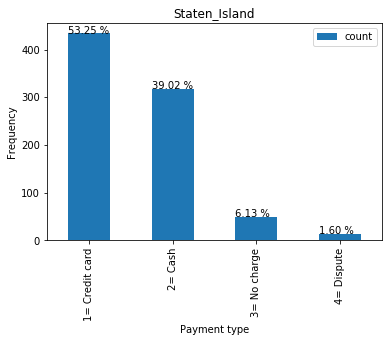

In [35]:
Staten_Island = frame.groupby(['Borough','payment_type'])['count'].sum()
Staten_Island=pd.DataFrame(Staten_Island)
Staten_Island=Staten_Island.reset_index(inplace=False)
durate_Staten_Island = Staten_Island[Staten_Island['Borough']=='Staten Island']
a = durate_Staten_Island.plot(title = 'Staten_Island', kind = 'bar')
a.set_xticklabels( ('1= Credit card','2= Cash','3= No charge','4= Dispute') )
a.set_ylabel('Frequency')
a.set_xlabel('Payment type')
for p in a.patches:
    a.annotate("%.2f %%" % (p.get_height()/sum(durate_Staten_Island['count'])*100), xy = (p.get_x(), p.get_height()))

plt.show()

Recalling that in this borough there are other categories of taxis that serve this zone, so, for this here we have very low number of passengers. However, of these passengers almost half pay with card and 40% pay with cash. Let's see how the cases of 'No charge' have a greater impact here.

### Conclusion
In all the borough, the most common way of payments is the credit card and the distribution of the payment type in each borough follows what we saw for the analysis of all of NYC.

Furthermore, in the analysis for NYC we have also considered journeys belonging to 'Unknown' (borough). The trips included under this name are all those trips where the driver has forgotten to enter the departure zone or the arrival zone. Obviously they are trips made, so, for this we have taken it into account in the general analysis of NYC but we will not take it into consideration in the analysis of the individual borough.


### Chi-squared test
to see whether the method of payment is correlated to the borough.
#### The Null and Alternate Hypotheses:
We are interested in knowing if there is a relationship between *method of payments* and *borough*. In order to do so, we would have to use the Chi-squared test. Now, let's state our null hypothesis and the alternative hypothesis.

**H0**:There isn't statistically significant relationship between method of payments and borough. 

**H1**:There is a statistically significant relationship between them.

In [36]:
frame1=pd.DataFrame(frame.groupby(['Borough','payment_type']).sum())
frame1=frame1.reset_index(inplace=False)
frame1

,Borough,payment_type,count
0,Bronx,1,27788
1,Bronx,2,26147
2,Bronx,3,1515
3,Bronx,4,360
4,Brooklyn,1,441890
5,Brooklyn,2,230533
6,Brooklyn,3,8789
7,Brooklyn,4,1923
8,EWR,1,3036
9,EWR,2,551


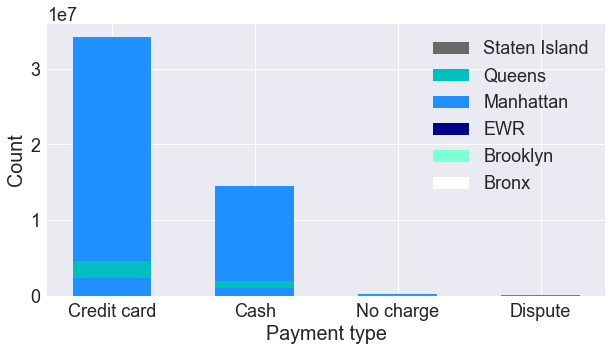

In [37]:
#Assigns the frequency values
count_bronx = frame1[frame1.Borough=='Bronx']['count'] 
count_brooklyn = frame1[frame1.Borough=='Brooklyn']['count'] 
count_EWR = frame1[frame1.Borough=='EWR']['count']
count_manhattan = frame1[frame1.Borough=='Manhattan']['count']
count_queens = frame1[frame1.Borough=='Queens']['count']
count_statenI = frame1[frame1.Borough=='Staten Island']['count']
#We did not take 'Unknown'

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ['Credit card','Cash','No charge','Dispute']
p1 = plt.bar(categories, count_bronx, 0.55, color='w')
p2 = plt.bar(categories, count_brooklyn, 0.55, bottom=count_bronx, color = 'aquamarine')
p3 = plt.bar(categories, count_EWR, 0.55, bottom=count_brooklyn,color = 'darkblue')
p4 = plt.bar(categories, count_manhattan, 0.55, bottom=count_EWR, color = 'dodgerblue')
p5 = plt.bar(categories, count_queens, 0.55, bottom=count_queens, color = 'c')
p6 = plt.bar(categories, count_statenI, 0.55, bottom=count_statenI, color = 'dimgray')
plt.legend((p6[0],p5[0],p4[0],p3[0], p2[0], p1[0]), ('Staten Island', 'Queens', 'Manhattan','EWR', 'Brooklyn','Bronx'))
plt.xlabel('Payment type')
plt.ylabel('Count')
plt.show()

The chart above show a ratio split between 'Borough' and 'Method of payment' for each time category. 

In [38]:
# Doing the Chi-Squared Test 
data_obs = np.array([count_bronx, count_brooklyn, count_EWR,count_manhattan, count_queens, count_statenI])
stats.chi2_contingency(data_obs)

(63744.51793080328,
 0.0,
 15,
 array([[3.88882324e+04, 1.65540977e+04, 2.88895670e+02, 7.87742381e+01],
        [4.76006318e+05, 2.02628266e+05, 3.53618964e+03, 9.64225751e+02],
        [2.68545507e+03, 1.14315522e+03, 1.99498999e+01, 5.43981211e+00],
        [3.41150625e+07, 1.45222357e+07, 2.53436405e+05, 6.91054308e+04],
        [2.33997065e+06, 9.96088030e+05, 1.73833406e+04, 4.73997901e+03],
        [5.67889436e+02, 2.41741438e+02, 4.21877748e+00, 1.15034947e+00]]))

**p-value = 0.0**
With a p-value < 0.05 , we can reject the null hypothesis. There is some sort of relationship between 'payment type' and the 'borough' column, so,these two variables are not independent of each other.

#### Calculate correlations:

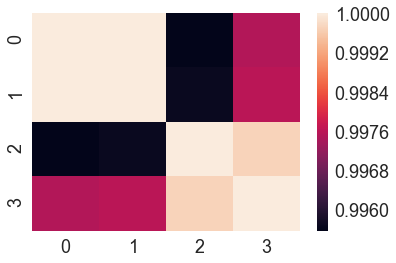

In [39]:
df_corr = pd.DataFrame(data_obs)
corr = df_corr.corr()

# Heatmap helps to visualize matrix-like data
sns.heatmap(corr)

In [40]:
del frame

# [RQ5] Does a long distance correlate with the duration of the trip on average?

### Clean up the data:
We delete the null values for both distance and duration and those where the average speed (in hourly miles) is excessively high or low.

In [43]:
format_date = '%Y-%m-%d %H:%M:%S'
# We take all the columns that interest me from all the datasets and I concatenate them
for i in range(6):
    df_month = pd.read_csv('yellow_tripdata_2018-0%s.csv' %(str(i+1)), sep=',', 
                     usecols=['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance'])
    try:
        df = pd.concat([df_month, df] , ignore_index=True)
    except:
        df = df_month
    del df_month
        
# We choose n random points from the dataframe
df = df.sample(1000)

In [44]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'].str.strip(), format = format_date)
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'].str.strip(), format = format_date)
# We find the time necessary to make a journey of a certain duration
df['time difference'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).astype('timedelta64[s]')
df = df[['time difference','trip_distance']]
# We delete the null values for both distance and duration and those where the average speed (in hourly miles) is
# excessively high or low
df = df.loc[(df['time difference'] > 0) & (df['trip_distance'] > 0) & ((df['trip_distance']/(df['time difference']/3600)) < 100)
       & ((df['trip_distance']/(df['time difference']/3600)) > 1)]

In [45]:
# let's consider only time difference up to 7200 seconds and trip distance up to 40 miles
df.columns = ['time_difference','trip_distance'] # change name to columns

Text(0.5,1,'Correlation')

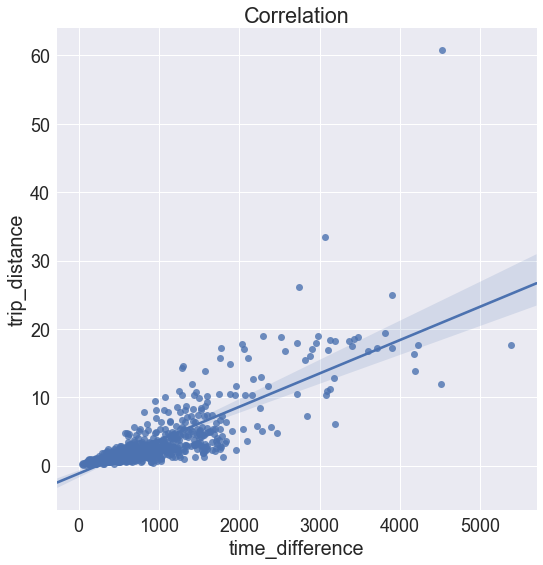

In [46]:
sns.lmplot(x= 'time_difference', y='trip_distance', data= df,size = 8,
           aspect =1) #size the dimension
plt.title("Correlation")

We do a plot that show the dependence between distance and duration of the trip. We study this relationships between two variables using the **Linear Regression**.

#### Pearson Coefficient:

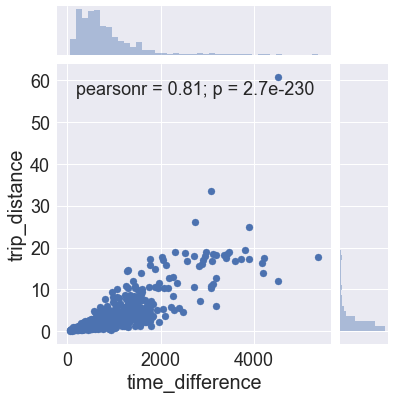

In [47]:
sns.jointplot(x= 'time_difference', y='trip_distance', data= df)
#Draw a plot of two variables with bivariate and univariate graphs

In [48]:
pcc = df.corr().iat[0,1] #pearson_correlation_coefficient
pcc

0.8090737792570704

So we can say that distance and duration of a trip are correlated.

In [49]:
del df

# [CRQ1]: Does the fare for mile change across NY's borough? 

Let's import our dataframe: take the important column and concatenate.
### Clean up the data:
- **Remove missing values**: With 'dropna()' we remove all the NAN values from the data frame;
- **Remove trip duration equal to zero**;
- **Remove <= 0 values on trip_distance and fare_amount**;
- **Remove all the years different from 2018**

In [52]:
start = dt.datetime.now()
borg = pd.read_csv('taxi_zone_lookup.csv', sep=',', 
                   usecols = ['LocationID','Borough'], 
                   dtype={'LocationID':'int16','Borough':'category'})

try:
    del df
except:
    pass

for i in range(6):
    df_month = pd.read_csv('yellow_tripdata_2018-0%s.csv' %(str(i+1)), sep=',', 
                     usecols=['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','fare_amount','PULocationID'],
                dtype={'PULocationID':'int16'})
    
    df_month["tpep_pickup_datetime"] = pd.to_datetime(df_month["tpep_pickup_datetime"])
    df_month["tpep_dropoff_datetime"] = pd.to_datetime(df_month["tpep_dropoff_datetime"])
    
    # add the column trip_duration
    df_month['trip_duration'] = (df_month["tpep_dropoff_datetime"] - df_month["tpep_pickup_datetime"])
    df_month.dropna #eliminating NA values
    
    df_month.trip_duration = pd.to_timedelta(df_month.trip_duration).astype('timedelta64[m]').astype(int)
    
    #clean data
    
    #removing null values
    df_month = df_month[df_month.trip_duration > 0]
    
    # eliminating <= 0 values on trip_distance and fare_amount
    df_month = df_month[(~(df_month[['trip_distance','fare_amount']] <= 0).any(axis=1))] 
    df_month = df_month[df_month.tpep_pickup_datetime.dt.year == 2018]
    
    #merging the dataset to borough, to have the name of the borough
    df_month = df_month[['trip_distance','fare_amount','PULocationID','trip_duration']]
    df_month = df_month.merge(borg, left_on = 'PULocationID', right_on = 'LocationID')
    df_month = df_month[['trip_distance','trip_duration','fare_amount','Borough']]
    
    #adding the P column
    df_month['P'] = df_month.fare_amount.div(df_month.trip_distance)
    
    #adding the P' column
    df_month['P\''] = df_month.P.div(df_month.trip_duration)
    
    df_month = df_month[['P','P\'', 'Borough']]
    
    try:
        df = pd.concat([df_month, df] , ignore_index=True)
    except:
        df = df_month
        
    del df_month
end = dt.datetime.now()
print('Running time equal to',end-start)                     

Running time equal to 0:01:44.856673


In [53]:
df.head()

,P,P',Borough
0,5.500000,1.100000,Manhattan
1,3.859649,0.087719,Manhattan
2,5.833333,0.833333,Manhattan
3,9.000000,3.000000,Manhattan
4,5.357143,0.765306,Manhattan


Before doing the t-test, we have to check if the samples have a bell shape, so we can say they come from a normal ditributions.

In [54]:
df = df.groupby('Borough') #gruop by borough

In [55]:
# defining the list of the boroughs
quartieri = sorted(list(borg.Borough.unique()))
quartieri.remove('Unknown')

#### Defining the function that plots the P for the borough

In [56]:
def plot_sample1(borough,quartiere):
    df = borough[['P']]
    df = df.rename(columns={'P':quartiere})
    ax = df.plot.density(legend=True, xlim=(-10,30))

#### Defining the function that plots the P' for the borough

In [57]:
def plot_sample2(borough,quartiere):
    df = borough[['P\'']]
    df = df.rename(columns={'P\'':quartiere})
    ax = df.plot.density(legend=True, xlim=(-10,30))

Plot the 'P' density for each borough

## Checking normal distribution (P)

in Bronx the P mean is: 5.199338958464869  while the standard deviation is: 5.288160358417178
in Brooklyn the P mean is: 5.152811240534234  while the standard deviation is: 3.540686494115178
in EWR the P mean is: 22.246784068941057  while the standard deviation is: 44.84364973925378
in Manhattan the P mean is: 6.207021466289221  while the standard deviation is: 3.267530272093503
in Queens the P mean is: 3.5894058237579056  while the standard deviation is: 3.334736318652635
in Staten Island the P mean is: 4.723868412102223  while the standard deviation is: 5.793729474869435


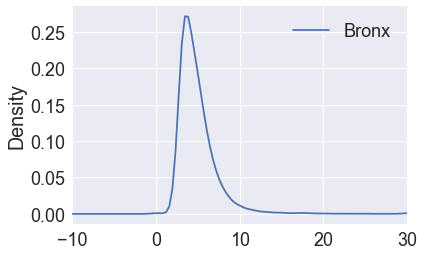

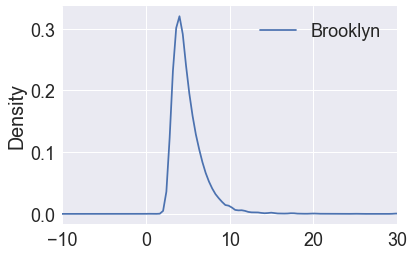

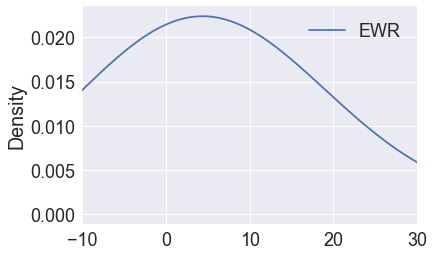

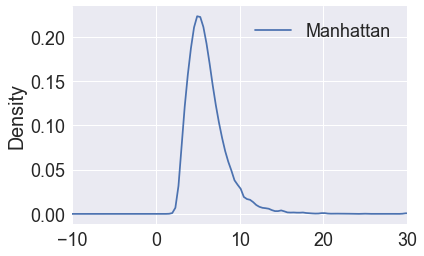

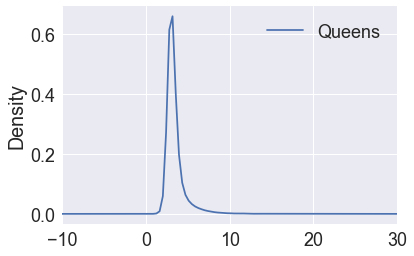

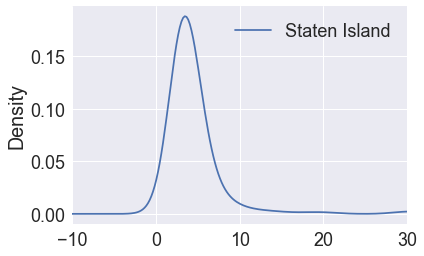

In [58]:
dict_quart = {} # dictionair of borough
for quartiere in quartieri[0:6]:
    borough = df.get_group(quartiere)
    borough = borough[borough['P'] < 200] #cleaning the data
    dict_quart[quartiere] = np.array(borough['P'])
    
    print('in',quartiere,'the P mean is:', borough['P'].mean(), ' while the standard deviation is:', borough['P'].std())
    
    if len(borough) > 10**5:              #sampling the data
        borough = borough.sample(10**5)
    
    
    plot_sample1(borough,quartiere)

As we can see, the data follow a **gaussian distribution** for each borough

## T-Test (P)

**H0** = sample distribution of the boroughs are equal

**H1** = sample distribution of the boroughs are different

In [59]:
quart_comb = itertools.combinations(quartieri,2)

In [60]:
for comb in quart_comb:
    quart_1 = comb[0]
    quart_2 = comb[1]
    
    stat, p = stats.ttest_ind(dict_quart[quart_1],dict_quart[quart_2])
    if p < 0.05:
        print(quart_1,'and',quart_2 ,'have different sample distributions, since p-value =',p)
    else:
        print(quart_1,'and',quart_2 ,'have the same sample distribution')

Bronx and Brooklyn have different sample distributions, since p-value = 0.006188916612759693
Bronx and EWR have different sample distributions, since p-value = 0.0
Bronx and Manhattan have different sample distributions, since p-value = 0.0
Bronx and Queens have different sample distributions, since p-value = 0.0
Bronx and Staten Island have the same sample distribution
Brooklyn and EWR have different sample distributions, since p-value = 0.0
Brooklyn and Manhattan have different sample distributions, since p-value = 0.0
Brooklyn and Queens have different sample distributions, since p-value = 0.0
Brooklyn and Staten Island have different sample distributions, since p-value = 0.008276404832884155
EWR and Manhattan have different sample distributions, since p-value = 0.0
EWR and Queens have different sample distributions, since p-value = 0.0
EWR and Staten Island have different sample distributions, since p-value = 2.0754862170631634e-16
Manhattan and Queens have different sample distrib

So the statistical evidence says that *P depends on the borough*.

### Checking normal distribution (P')

in Bronx the P' mean is: 1.2892910035125371  while the standard deviation is: 20.00878552090464
in Brooklyn the P' mean is: 1.025254217832757  while the standard deviation is: 28.721455547032825
in EWR the P' mean is: 154.04291409477787  while the standard deviation is: 592.4748005875052
in Manhattan the P' mean is: 1.0994482116506654  while the standard deviation is: 14.583025784589912
in Queens the P' mean is: 0.6612430115039799  while the standard deviation is: 30.817480378547753
in Staten Island the P' mean is: 4.726415690062759  while the standard deviation is: 62.75212831030559


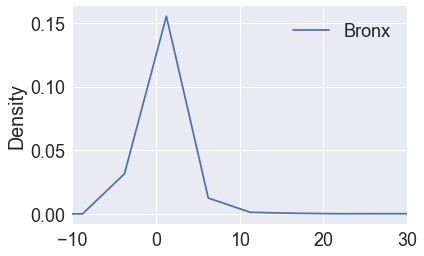

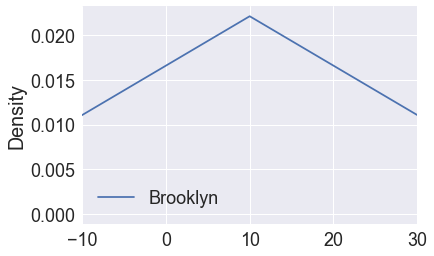

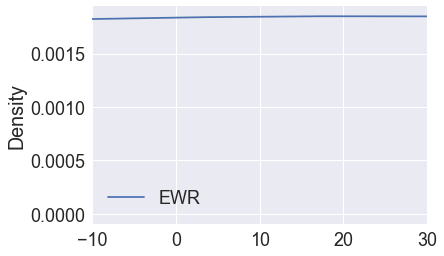

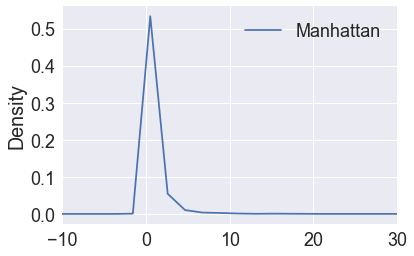

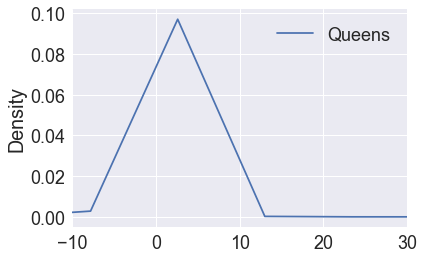

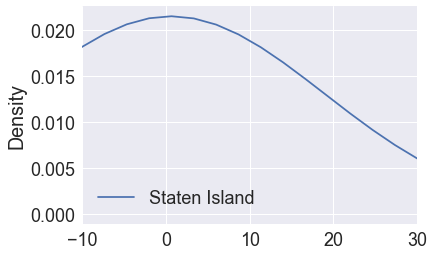

In [61]:
dict_quart = {} # dictionair of borough
for quartiere in quartieri[0:6]:
    borough = df.get_group(quartiere)
    
    dict_quart[quartiere] = np.array(borough['P\''])
    
    print('in',quartiere,'the P\' mean is:', borough['P\''].mean(), ' while the standard deviation is:', borough['P\''].std())
    
    if len(borough) > 10**5:              #sampling the data
        borough = borough.sample(10**5)
    
    
    plot_sample2(borough,quartiere)

Although not all of them follow a Gaussian, we try to do the T-test anyway.

## T-Test (P')

**H0** = sample distribution of the boroughs are equal

**H1** = sample distribution of the boroughs are different

In [62]:
quart_comb = itertools.combinations(quartieri,2)

In [63]:
for comb in quart_comb:
    quart_1 = comb[0]
    quart_2 = comb[1]
    
    stat, p = stats.ttest_ind(dict_quart[quart_1],dict_quart[quart_2])
    if p < 0.05:
        print(quart_1,'and',quart_2 ,'have different sample distributions, since p-value =',p)
    else:
        print(quart_1,'and',quart_2 ,'have the same sample distribution')

Bronx and Brooklyn have different sample distributions, since p-value = 0.041781208207556486
Bronx and EWR have different sample distributions, since p-value = 0.0
Bronx and Manhattan have different sample distributions, since p-value = 0.0033598717058580738
Bronx and Queens have different sample distributions, since p-value = 4.636621398743282e-06
Bronx and Staten Island have different sample distributions, since p-value = 0.0003180329771828156
Brooklyn and EWR have different sample distributions, since p-value = 0.0
Brooklyn and Manhattan have different sample distributions, since p-value = 5.1994645455588084e-05
Brooklyn and Queens have different sample distributions, since p-value = 6.531028267693074e-19
Brooklyn and Staten Island have different sample distributions, since p-value = 0.0048259962354185665
EWR and Manhattan have different sample distributions, since p-value = 0.0
EWR and Queens have different sample distributions, since p-value = 0.0
EWR and Staten Island have differ

So the statistical evidence says that *P' depends on the borough* too.

# [CRQ2] Visualize Taxis movements!

In [64]:
#charge our json file
my_NYC_map = "taxi_zones.json"

In [65]:
# put in m the map of NY
m = folium.Map(location = [40.8, -73.9], zoom_start = 11)

In [66]:
m

In [ ]:
# add to the map the single zones of the file.
folium.GeoJson(
    my_NYC_map,
    style_function = lambda feature: {
        "fillColor": "#ffff00",
        "color": "black",
        "weight": 2,
        "dashArray": "5, 5"
    }
).add_to(m)

m.save("mappa1.html")

m
#the html file is located in the folder

We here decide to clean data from every nan value, every pickup date with year different from 2018, every data with trip distance less or equal than 0 because for this analisys we find them useless.

In [ ]:
#charge the datasets
for i in range (6):    
    iter_csv = pd.read_csv("yellow_tripdata_2018-0%s.csv" %(str(i+1)), sep = ",", 
                               usecols= ["tpep_pickup_datetime","tpep_dropoff_datetime","trip_distance","PULocationID","DOLocationID"],dtype={'passenger_count':'int16',
                                                                                                          'PULocationID':'int16'})
    
    #cleaning the nan values
    iter_csv.dropna
    
    #cleaning the data with year that is different from 2018
    date = pd.to_datetime(iter_csv['tpep_pickup_datetime'].str.strip())
    iter_csv = iter_csv[date.dt.year == 2018]
    
    #cleaning data from trip distance values equal to 0
    iter_csv = iter_csv[(iter_csv['trip_distance'] > 0)]
    
    iter_csv = iter_csv[["PULocationID","DOLocationID"]]
    
    try :
        merged = pd.concat([iter_csv, merged], ignore_index = False)
    except:
        merged = iter_csv
    del iter_csv

In [ ]:
# Here we are creating a new column 
merged["P_U_LocationID"] = merged["PULocationID"]
data_pu = merged.set_index("PULocationID")["P_U_LocationID"]

merged["D_O_LocationID"] = merged["DOLocationID"]
data_do = merged.set_index("DOLocationID")["D_O_LocationID"]

In [ ]:
#here we create a dict; the keys are the locID and eache key has as value the number of occurrences in the single month dataset
pu = pd.DataFrame(data_pu.value_counts())
pu_dict = pu.set_index(pu.index)["P_U_LocationID"]

do = pd.DataFrame(data_do.value_counts())
do_dict = do.set_index(do.index)["D_O_LocationID"]

In [ ]:
# Here we create the color...
colormap = linear.YlGn_09.scale(
    pu_dict.min(),
    pu_dict.max())

print(colormap(5.0))

colormap

In [ ]:
#I have created this functions because when i was creating the maps, I had always an error..in this way everything works.

def f1(feature):
    try:
        return pu_dict[feature["properties"]["LocationID"]]
    except:
        return 2
    
def f2(feature):
    try:
        return do_dict[feature["properties"]["LocationID"]]
    except:
        return 2

In [ ]:
folium.GeoJson(
    my_NYC_map,
    name = "2018 - pick up",
    style_function = lambda feature: {
        "fillColor": colormap(f1(feature)),
        "color": "black",
        "weight": 1,
        "dashArray": "5, 5",
        "fillOpacity": 0.9,
    }
).add_to(m)

m.save("mappa2018pu.html")

m

The map is in an html called "mappa2018pu".

In [ ]:
# Here we create the color...
colormap = linear.YlGn_09.scale(
    do_dict.min(),
    do_dict.max())

print(colormap(5.0))

colormap

In [ ]:
folium.GeoJson(
    my_NYC_map,
    name = "2018 - drop off",
    style_function = lambda feature: {
        "fillColor": colormap(f2(feature)),
        "color": "black",
        "weight": 1,
        "dashArray": "5, 5",
        "fillOpacity": 0.9,
    }
).add_to(m)

m.save("mappa2018do.html")

m

The map is an html file called "mappa2018do"

# RQ 6 (bonus) : "Which day is the one with most passengers for each months?

On the other notebook